# Somerville Happiness Survey response

#### We filtered the data in order to balanced out our classes 

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef

In [ ]:
df_all=pd.read_csv('/content/Somerville_Happiness_Survey_ResponsesAll_final.csv')
df_all=df_all[[ 'Combined_ID', 'Year', 'How.happy.do.you.feel.right.now',
       'How.satisfied.are.you.with.your.life.in.general',
       'How.satisfied.are.you.with.Somerville.as.a.place.to.live',
       'How.satisfied.are.you.with.your.neighborhood',
       'How.proud.are.you.to.be.a.Somerville.resident',
       'How.would.you.rate.the.following..The.availability.of.information.about.city.services',
       'How.would.you.rate.the.following..The.cost.of.housing',
       'How.would.you.rate.the.following..The.overall.quality.of.public.schools',
       'How.would.you.rate.the.following..Your.trust.in.the.local.police',
       'How.would.you.rate.the.following..The.maintenance.of.streets.and.sidewalks',
       'How.would.you.rate.the.following..The.availability.of.social.community.events',
       'How.safe.do.you.feel.walking.in.your.neighborhood.at.night',
       'How.satisfied.are.you.with.the.beauty.or.physical.setting.of.your.neighborhood',
       'How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood',
       'What.is.your.gender', 'Age', 'What.is.your.race.or.ethnicity',
       'Do.you.have.children.age.18.or.younger.who.live.with.you',
       'Describe.your.housing.status.in.Somerville',
       'Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years',
       'How.long.have.you.lived.here', 'What.is.your.annual.household.income',
       'Are.you.a.student', 'How.anxious.did.you.feel.yesterday',
       'How.satisfied.are.you.with.the.quality.and.number.of.transportation.options.available.to.you',
       'Language', 'What.languages.do.you.speak.at.home']]
#df_all=df_all.dropna(thresh=15)
df_all.shape
#df_all.to_csv('all_data.csv')

(8886, 29)

In [ ]:
# Converting 'How.happy.do.you.feel.right.now' column into numeric 
# COnsidering 0 as happy and 1 as unhappy
df_all['Class'] = 0
df_all.loc[df_all['How.happy.do.you.feel.right.now'] < 5, 'Class'] = 1
df_all['Class'].value_counts()

0    8175
1     711
Name: Class, dtype: int64

In [ ]:
df_all_unhappy=df_all[df_all['Class']==1]
df_all_Happy=df_all[df_all['Class']==0]
df_all_Happy=df_all_Happy.dropna(thresh=28)
df_all_Happy.shape

(698, 30)

In [ ]:
frames = [df_all_Happy,df_all_unhappy]
Somerville_happiness = pd.concat(frames)
Somerville_happiness['Class'].value_counts()

1    711
0    698
Name: Class, dtype: int64

In [ ]:
print(Somerville_happiness.columns)

Index(['Combined_ID', 'Year', 'How.happy.do.you.feel.right.now',
       'How.satisfied.are.you.with.your.life.in.general',
       'How.satisfied.are.you.with.Somerville.as.a.place.to.live',
       'How.satisfied.are.you.with.your.neighborhood',
       'How.proud.are.you.to.be.a.Somerville.resident',
       'How.would.you.rate.the.following..The.availability.of.information.about.city.services',
       'How.would.you.rate.the.following..The.cost.of.housing',
       'How.would.you.rate.the.following..The.overall.quality.of.public.schools',
       'How.would.you.rate.the.following..Your.trust.in.the.local.police',
       'How.would.you.rate.the.following..The.maintenance.of.streets.and.sidewalks',
       'How.would.you.rate.the.following..The.availability.of.social.community.events',
       'How.safe.do.you.feel.walking.in.your.neighborhood.at.night',
       'How.satisfied.are.you.with.the.beauty.or.physical.setting.of.your.neighborhood',
       'How.satisfied.are.you.with.the.appearance.o

In [ ]:
Somerville_happiness.dtypes

Combined_ID                                                                                     float64
Year                                                                                              int64
How.happy.do.you.feel.right.now                                                                 float64
How.satisfied.are.you.with.your.life.in.general                                                 float64
How.satisfied.are.you.with.Somerville.as.a.place.to.live                                        float64
How.satisfied.are.you.with.your.neighborhood                                                    float64
How.proud.are.you.to.be.a.Somerville.resident                                                   float64
How.would.you.rate.the.following..The.availability.of.information.about.city.services           float64
How.would.you.rate.the.following..The.cost.of.housing                                           float64
How.would.you.rate.the.following..The.overall.quality.of.public.

In [ ]:
Somerville_happiness.isna().sum()

Combined_ID                                                                                       0
Year                                                                                              0
How.happy.do.you.feel.right.now                                                                   0
How.satisfied.are.you.with.your.life.in.general                                                   7
How.satisfied.are.you.with.Somerville.as.a.place.to.live                                         33
How.satisfied.are.you.with.your.neighborhood                                                    510
How.proud.are.you.to.be.a.Somerville.resident                                                   648
How.would.you.rate.the.following..The.availability.of.information.about.city.services           529
How.would.you.rate.the.following..The.cost.of.housing                                           514
How.would.you.rate.the.following..The.overall.quality.of.public.schools                         692


### some columns contains null values
### Our class attribute is 'How.happy.do.you.feel.right.now'

# Preprocessing steps :
1. There are some rows where value is null hence we will replace those values with mean value of the entire column
2. For classification purpose we are considering the resident with 5 and above rating in the column 'How.happy.do.you.feel.right.now' as happy resident and unhappy otherwise 
3. Convert categorical to numeric data 
4. Some rows like 'How.long.have.you.lived.here' and	'What.is.your.annual.household.income' needs preprocessing (remove unwanted special characters)
5. Row containing gender contains many redundant values

## Replaced null values with mean values of the column

In [ ]:
Allcolumns=Somerville_happiness.columns
Allcolumns=Allcolumns[3:]
string_columns=Allcolumns[13:23]
string_columns = list(string_columns.values)
string_columns.append('What.languages.do.you.speak.at.home')
string_columns.append('Language')
Allcolumns=list(Allcolumns.values)
del Allcolumns[13:23]
del Allcolumns[-1]
del Allcolumns[-1]
del Allcolumns[-1]
Happy_df=Somerville_happiness[Somerville_happiness['Class']==0]
Unhappy_df=Somerville_happiness[Somerville_happiness['Class']==1]
for i in Allcolumns:
  Happy_df[i]=Happy_df[i].fillna(Happy_df[i].mean())
  Unhappy_df[i]=Unhappy_df[i].fillna(Unhappy_df[i].mean())
for i in string_columns:
  Happy_df[i]=Happy_df[i].fillna(Happy_df[i].agg(lambda x: x.mode().values[0]))
  Unhappy_df[i]=Unhappy_df[i].fillna(Unhappy_df[i].agg(lambda x: x.mode().values[0]))
frames = [Happy_df,Unhappy_df]
Somerville_happiness = pd.concat(frames)
Somerville_happiness['Class'].value_counts()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

1    711
0    698
Name: Class, dtype: int64

In [ ]:
Somerville_happiness.isna().sum()

Combined_ID                                                                                     0
Year                                                                                            0
How.happy.do.you.feel.right.now                                                                 0
How.satisfied.are.you.with.your.life.in.general                                                 0
How.satisfied.are.you.with.Somerville.as.a.place.to.live                                        0
How.satisfied.are.you.with.your.neighborhood                                                    0
How.proud.are.you.to.be.a.Somerville.resident                                                   0
How.would.you.rate.the.following..The.availability.of.information.about.city.services           0
How.would.you.rate.the.following..The.cost.of.housing                                           0
How.would.you.rate.the.following..The.overall.quality.of.public.schools                         0
How.would.you.rate.t

In [ ]:
Somerville_happiness['What.is.your.annual.household.income'].unique()
Somerville_happiness['How.long.have.you.lived.here'].mask(Somerville_happiness['How.long.have.you.lived.here'] == '21 years or more', '21', inplace=True)
Somerville_happiness['How.long.have.you.lived.here'].mask(Somerville_happiness['How.long.have.you.lived.here'] == 'Less than a year', '0.5', inplace=True)
Somerville_happiness['How.long.have.you.lived.here'].mask(Somerville_happiness['How.long.have.you.lived.here'] == '9 months', '0.75', inplace=True)
Somerville_happiness['How.long.have.you.lived.here'].mask(Somerville_happiness['How.long.have.you.lived.here'] == '6 months', '0.5', inplace=True)
Somerville_happiness['How.long.have.you.lived.here'].mask(Somerville_happiness['How.long.have.you.lived.here'] == 'less than 10 months', '0.8', inplace=True)
Somerville_happiness['How.long.have.you.lived.here'] = Somerville_happiness['How.long.have.you.lived.here'].str.replace('years', '')
Somerville_happiness['How.long.have.you.lived.here'] = Somerville_happiness['How.long.have.you.lived.here'].str.replace('year', '')
Somerville_happiness['How.long.have.you.lived.here'] = Somerville_happiness['How.long.have.you.lived.here'].str.replace('+', '')
Somerville_happiness['How.long.have.you.lived.here'] = Somerville_happiness['How.long.have.you.lived.here'].str.replace(' ', '')
Somerville_happiness['How.long.have.you.lived.here'] = Somerville_happiness['How.long.have.you.lived.here'].astype(float)
Somerville_happiness['How.long.have.you.lived.here'].unique()
#At first glance these coumns looks like string columns but are categorical 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


array([1.300e+01, 1.115e+03, 2.100e+01, 4.700e+01, 8.100e+02, 5.000e-01,
       1.620e+03, 4.000e+01, 6.600e+01, 6.500e+01, 3.000e+00, 3.900e+01,
       3.000e+01, 2.000e+00, 7.000e+00, 2.800e+01, 7.000e+01, 2.000e+01,
       9.000e+00, 2.600e+01, 7.500e-01, 2.500e+00, 7.700e+01, 8.000e+00,
       1.500e+00, 1.500e+01, 4.200e+01, 2.500e+01, 3.300e+01, 1.000e+01,
       1.000e+00, 4.000e+00, 5.800e+01, 2.300e+01, 4.500e+01, 5.300e+01,
       6.000e+00, 2.400e+01, 5.150e+01, 6.400e+01, 5.000e+00, 5.000e+01,
       3.600e+01, 1.800e+01, 5.100e+01, 6.800e+01, 9.000e+01, 8.000e-01,
       1.400e+01, 1.100e+01, 6.200e+01, 2.900e+01])

In [ ]:
# Removing redundant values from column containing gender i.e., What.is.your.gender
Somerville_happiness['What.is.your.gender'].mask(Somerville_happiness['What.is.your.gender'] == '(both selected)', 'Both checked', inplace=True)
Somerville_happiness['What.is.your.gender'].mask(Somerville_happiness['What.is.your.gender'] == 'Both Checked', 'Both checked', inplace=True)

Somerville_happiness['What.is.your.gender'].mask(Somerville_happiness['What.is.your.gender'] == 'both male and female selected', 'Both checked', inplace=True)
Somerville_happiness['What.is.your.gender'].mask(Somerville_happiness['What.is.your.gender'] == 'both selected', 'Both checked', inplace=True)
Somerville_happiness['What.is.your.gender'].mask(Somerville_happiness['What.is.your.gender'] == 'Female + Male checked', 'Both checked', inplace=True)
Somerville_happiness['What.is.your.gender'].mask(Somerville_happiness['What.is.your.gender'] == 'Checked Female & Male', 'Both checked', inplace=True)
Somerville_happiness['What.is.your.gender'].mask(Somerville_happiness['What.is.your.gender'] == 'both male and female checked', 'Both checked', inplace=True)
Somerville_happiness['What.is.your.gender'].mask(Somerville_happiness['What.is.your.gender'] == 'both make and female checked', 'Both checked', inplace=True)
Somerville_happiness['What.is.your.gender'].mask(Somerville_happiness['What.is.your.gender'] == 'Male and Female', inplace=True)
Somerville_happiness['What.is.your.gender'].mask(Somerville_happiness['What.is.your.gender'] == 'Both female and male checked', 'Both checked', inplace=True)
Somerville_happiness['What.is.your.gender'].mask(Somerville_happiness['What.is.your.gender'] == 'a cou', 'couple', inplace=True)
Somerville_happiness['What.is.your.gender'].mask(Somerville_happiness['What.is.your.gender'] == '2 of us', 'couple', inplace=True)
Somerville_happiness['What.is.your.gender'].mask(Somerville_happiness['What.is.your.gender'] == None, 'I don\'t believe in the social construct of gender', inplace=True)
Somerville_happiness['What.is.your.gender'] = Somerville_happiness['What.is.your.gender'].fillna('I don\'t believe in the social construct of gender')

# Exploratory Data Analysis

In [ ]:
df=Somerville_happiness.copy()
Happy=df[df['Class']==0]
Unhappy=df[df['Class']==1]
#df['How.happy.do.you.feel.right.now'].mask(df['How.happy.do.you.feel.right.now'] == 'Unhappy', 1, inplace=True)
#df['How.happy.do.you.feel.right.now'].mask(df['How.happy.do.you.feel.right.now'] == 'Happy', 0, inplace=True)

df.columns
df['Response'] = np.where(df['Class']== 0, "Happy", "Unhappy")
import seaborn as sns
import matplotlib.pyplot as plt


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbead7e7a90>],
      dtype=object)

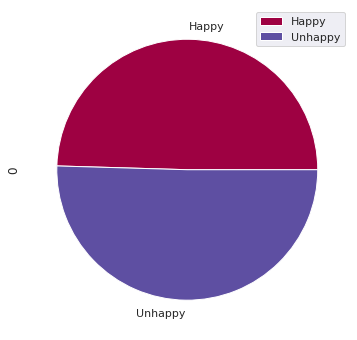

In [ ]:
happy= df['Class'].value_counts()[0]
unhappy= df['Class'].value_counts()[1]
p = [happy, unhappy]
plt_data = pd.DataFrame(p)
plt_data.plot(kind='pie', subplots=True, labels=['Happy', 'Unhappy'],figsize=(6,6), colormap="Spectral")

In [ ]:
df.columns

Index(['Combined_ID', 'Year', 'How.happy.do.you.feel.right.now',
       'How.satisfied.are.you.with.your.life.in.general',
       'How.satisfied.are.you.with.Somerville.as.a.place.to.live',
       'How.satisfied.are.you.with.your.neighborhood',
       'How.proud.are.you.to.be.a.Somerville.resident',
       'How.would.you.rate.the.following..The.availability.of.information.about.city.services',
       'How.would.you.rate.the.following..The.cost.of.housing',
       'How.would.you.rate.the.following..The.overall.quality.of.public.schools',
       'How.would.you.rate.the.following..Your.trust.in.the.local.police',
       'How.would.you.rate.the.following..The.maintenance.of.streets.and.sidewalks',
       'How.would.you.rate.the.following..The.availability.of.social.community.events',
       'How.safe.do.you.feel.walking.in.your.neighborhood.at.night',
       'How.satisfied.are.you.with.the.beauty.or.physical.setting.of.your.neighborhood',
       'How.satisfied.are.you.with.the.appearance.o

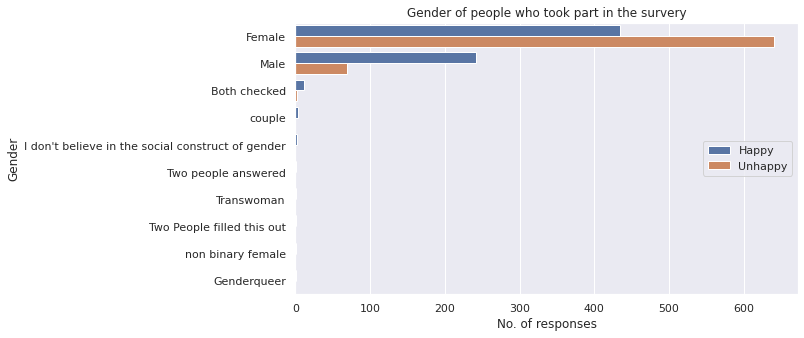

In [ ]:
plt.figure(figsize=(9, 5))
happyunhappyorder = df['What.is.your.gender'].value_counts().head(10).index

sns.countplot(data=df, y='What.is.your.gender',hue='Response', order=happyunhappyorder)

plt.title('Gender of people who took part in the survery')
plt.xlabel('No. of responses')
plt.ylabel('Gender');
plt.legend(loc='center right')

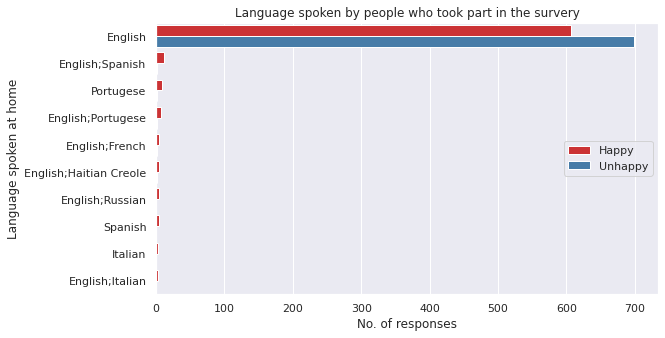

In [ ]:
plt.figure(figsize=(9, 5))
happyunhappyorder = df['What.languages.do.you.speak.at.home'].value_counts().head(10).index

sns.countplot(data=df, y='What.languages.do.you.speak.at.home',hue='Response', palette="Set1",order=happyunhappyorder)

plt.title('Language spoken by people who took part in the survery')
plt.xlabel('No. of responses')
plt.ylabel('Language spoken at home');
plt.legend(loc='center right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


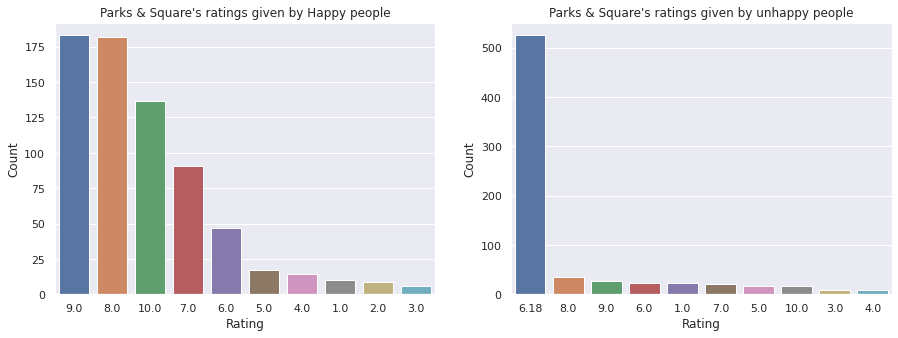

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
Happy['How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood'] = Happy['How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood'].round(2);
Unhappy['How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood'] = Unhappy['How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood'].round(2);

happyunhappyorder = Happy['How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood'].value_counts().head(10).index;

sns.countplot(data=Happy, x='How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood', order=happyunhappyorder);

plt.title('Parks & Square\'s ratings given by Happy people');
plt.xlabel('Rating');
plt.ylabel('Count');
#plt.legend(loc='center right');

plt.subplot(1, 2, 2)
happyunhappyorder = Unhappy['How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood'].value_counts().head(10).index

sns.countplot(data=Unhappy, x='How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood', order=happyunhappyorder);

plt.title('Parks & Square\'s ratings given by unhappy people');
plt.xlabel('Rating');
plt.ylabel('Count');
#plt.legend(loc='center right');
plt.show();

'Combined_ID',
 'Year',
 'How.satisfied.are.you.with.your.life.in.general',
 'How.satisfied.are.you.with.your.neighborhood',
 'How.proud.are.you.to.be.a.Somerville.resident',
 'How.would.you.rate.the.following..The.overall.quality.of.public.schools',
 'How.would.you.rate.the.following..The.availability.of.social.community.events',
 'How.satisfied.are.you.with.the.quality.and.number.of.transportation.options.available.to.you']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

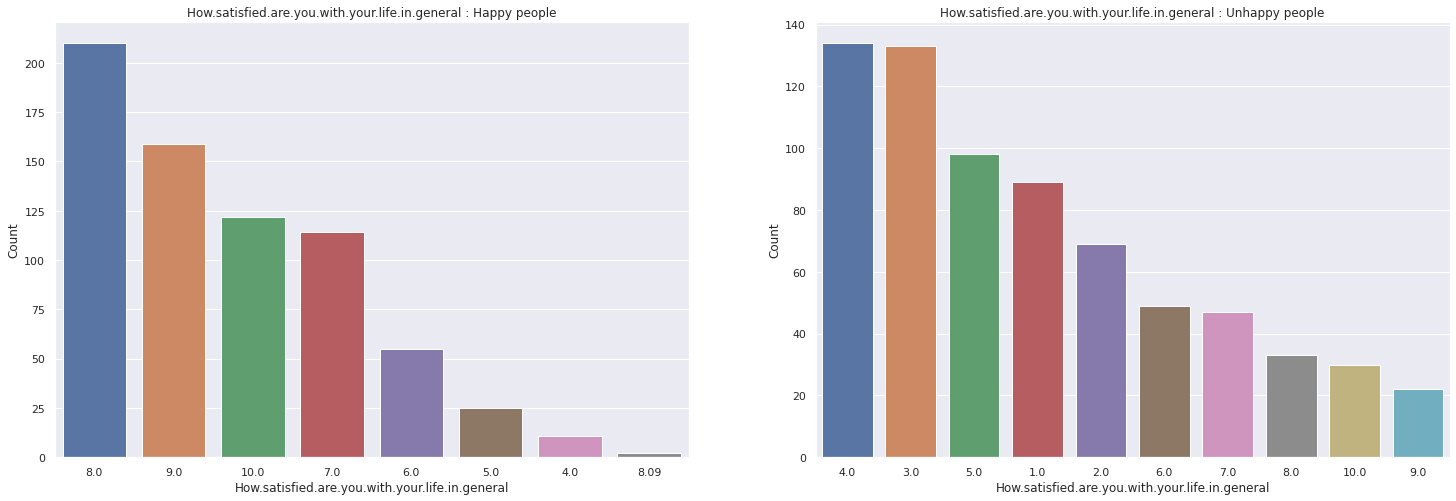

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


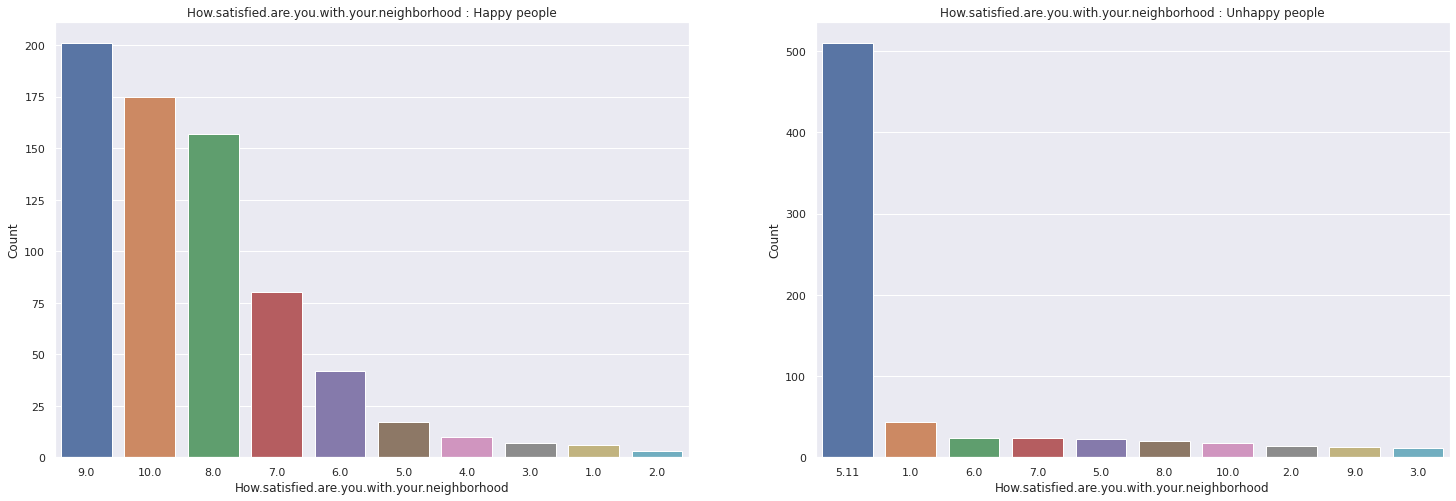

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


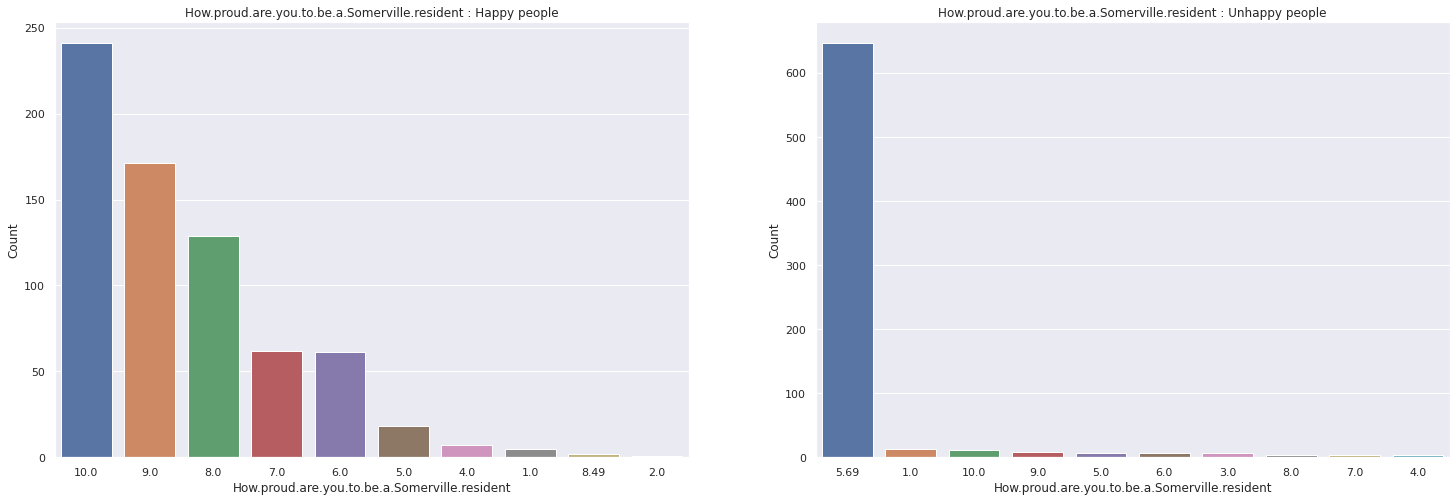

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


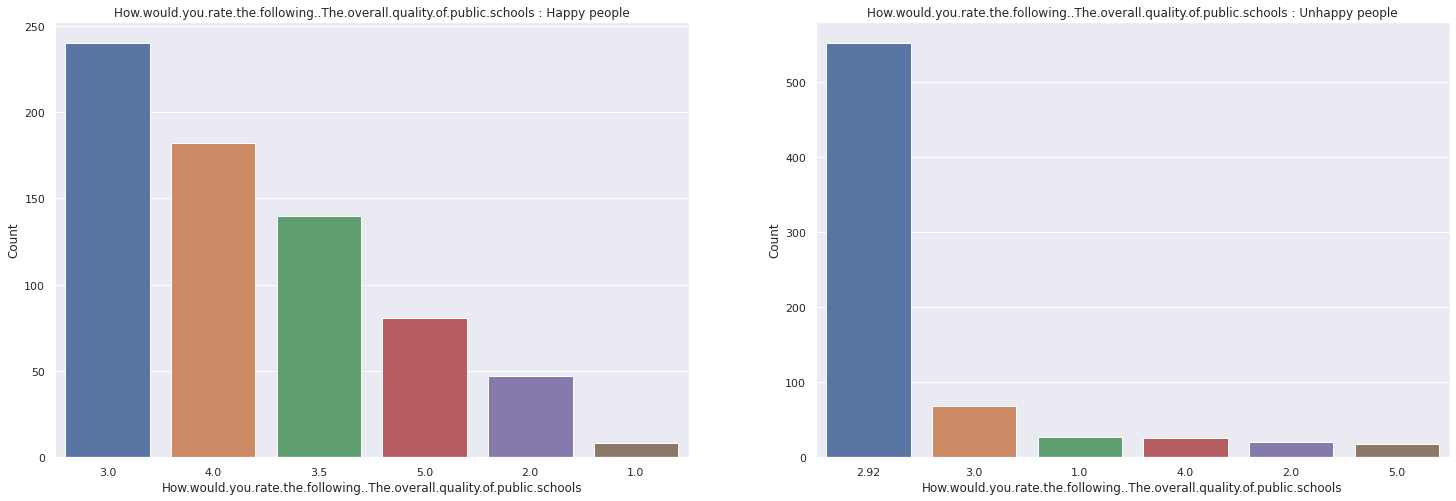

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


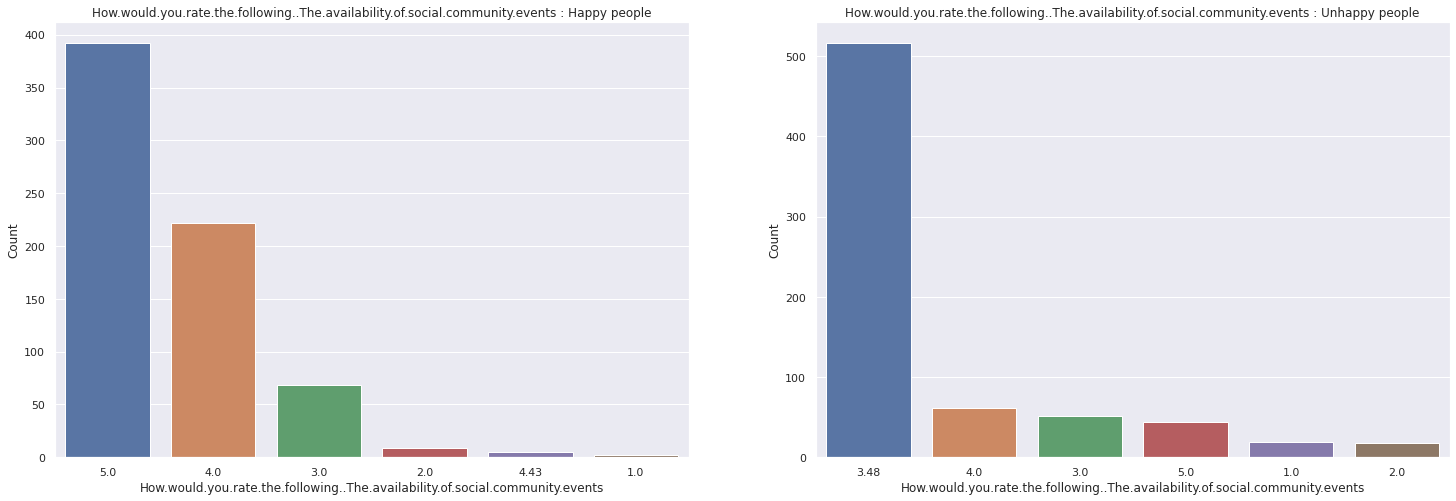

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


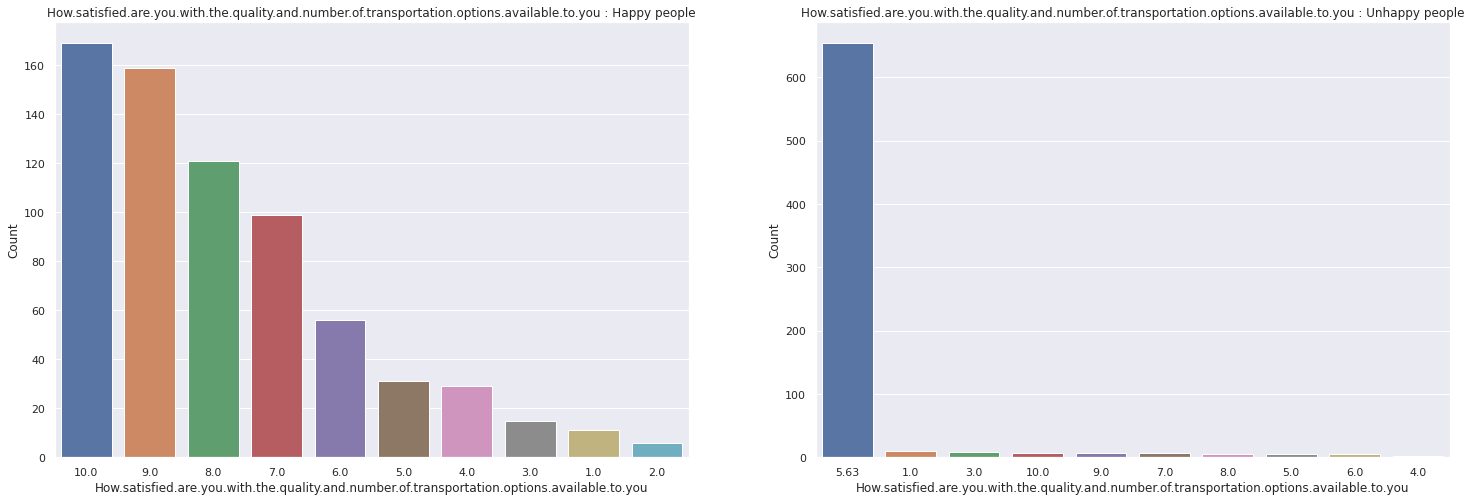

In [ ]:
Happy['How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood'] = Happy['How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood'].round(2);
Unhappy['How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood'] = Unhappy['How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood'].round(2);

a=[
 
 'How.satisfied.are.you.with.your.life.in.general',
 'How.satisfied.are.you.with.your.neighborhood',
 'How.proud.are.you.to.be.a.Somerville.resident',
 'How.would.you.rate.the.following..The.overall.quality.of.public.schools',
 'How.would.you.rate.the.following..The.availability.of.social.community.events',
 'How.satisfied.are.you.with.the.quality.and.number.of.transportation.options.available.to.you']
for i in a:
  plt.figure(figsize=(25, 8))
  plt.subplot(1, 2, 1)
  Happy[i] = Happy[i].round(2);
  Unhappy[i] = Unhappy[i].round(2);

  happyunhappyorder = Happy[i].value_counts().head(10).index;

  sns.countplot(data=Happy, x=i, order=happyunhappyorder);

  plt.title(str(i)+' : Happy people');
  plt.xlabel(str(i));
  plt.ylabel('Count');
  #plt.legend(loc='center right');

  plt.subplot(1, 2, 2)
  happyunhappyorder = Unhappy[i].value_counts().head(10).index

  sns.countplot(data=Unhappy, x=i, order=happyunhappyorder);

  plt.title( str(i)+' : Unhappy people');
  plt.xlabel(str(i));
  plt.ylabel('Count');
  #plt.legend(loc='center right');
  plt.show();

No handles with labels found to put in legend.


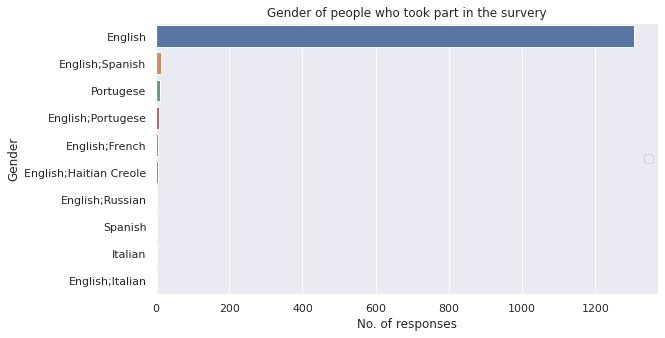

In [ ]:
plt.figure(figsize=(9, 5))
happyunhappyorder = df['What.languages.do.you.speak.at.home'].value_counts().head(10).index

sns.countplot(data=df, y='What.languages.do.you.speak.at.home', order=happyunhappyorder)

plt.title('Gender of people who took part in the survery')
plt.xlabel('No. of responses')
plt.ylabel('Gender');
plt.legend(loc='center right')

## Label Encoding non numeric columns

In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
for i in string_columns:
  Somerville_happiness[i]= label_encoder.fit_transform(Somerville_happiness[i].astype(str))


In [ ]:
Somerville_happiness=Somerville_happiness.drop(columns=['How.happy.do.you.feel.right.now'])
Somerville_happiness.shape

(1409, 29)

In [ ]:
Somerville_happiness['Class'].value_counts()

1    711
0    698
Name: Class, dtype: int64

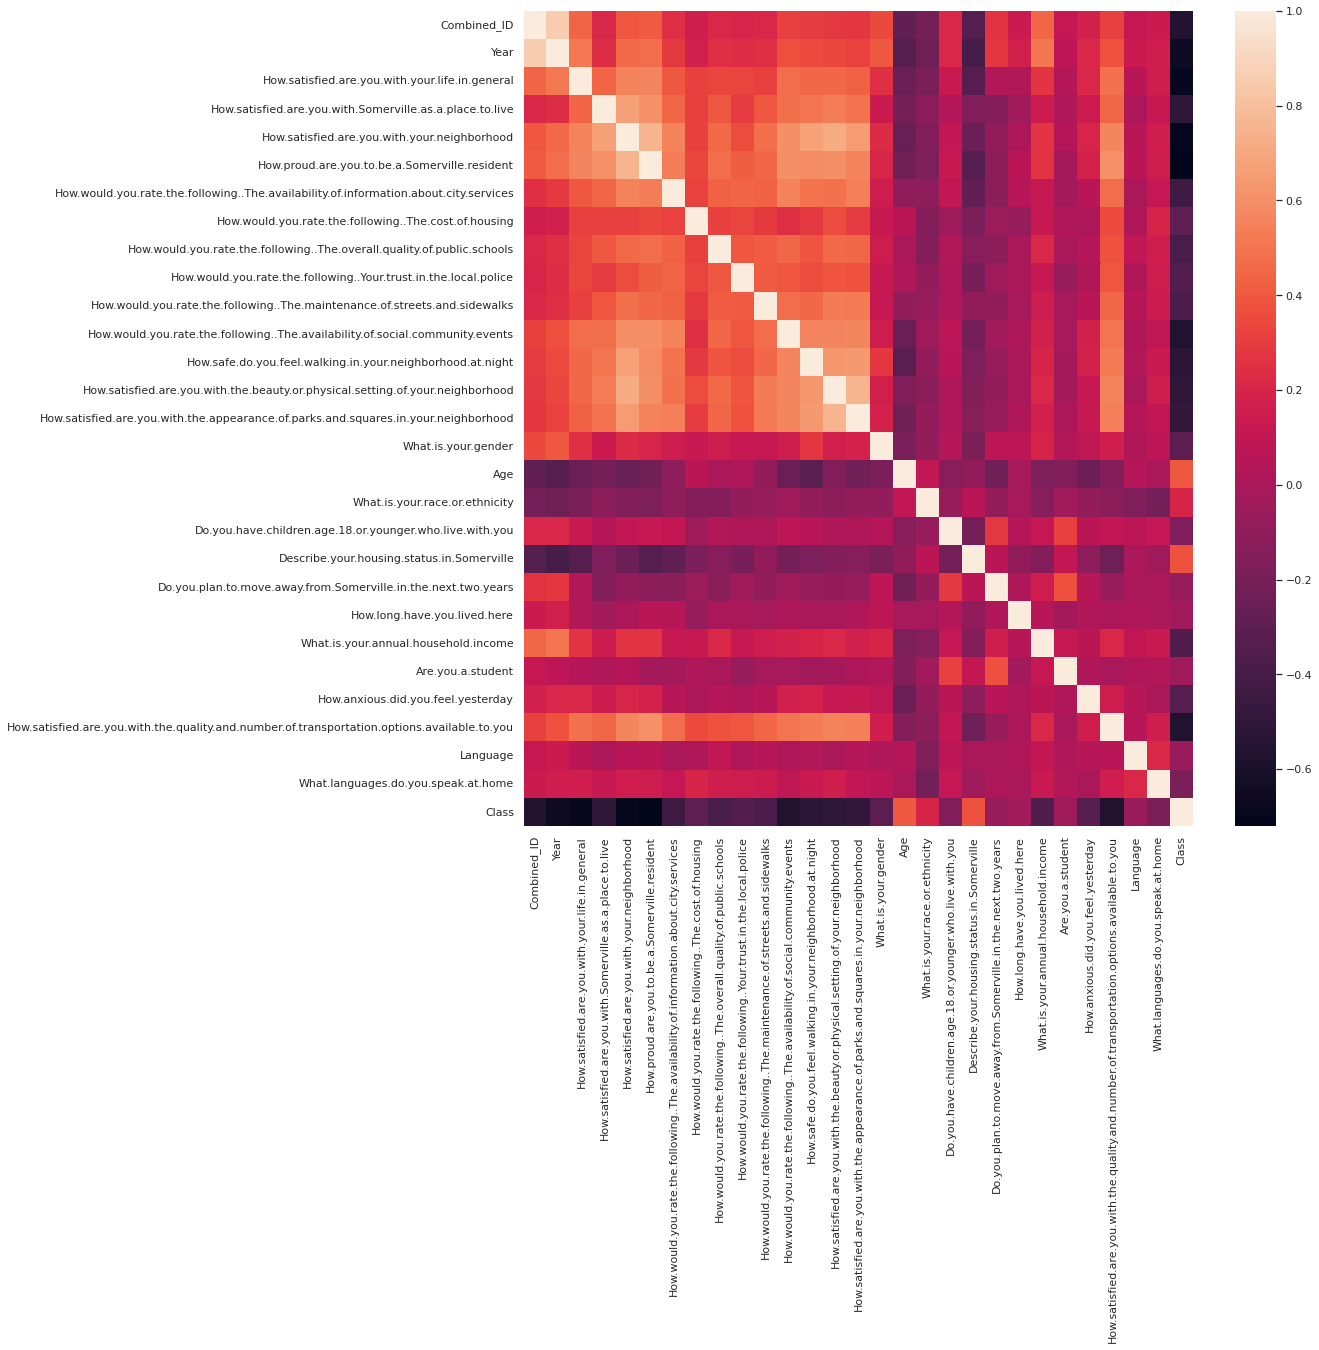

In [ ]:
df2=Somerville_happiness.copy()
#df2=df2.drop(columns=['Class'])
import seaborn as sns; sns.set_theme()
sns.set(rc = {'figure.figsize':(15,15)})
ax = sns.heatmap(df2.corr())

In [ ]:
matrix = df2.corr()
upper_corr_mat = matrix.where(
    np.triu(np.ones(matrix.shape), k=1).astype(np.bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()

sorted_mat = unique_corr_pairs.sort_values(ascending=False)
correlation=pd.DataFrame(sorted_mat)
correlation.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


0
Year                                               Combined_ID                                         0.854345
How.satisfied.are.you.with.the.appearance.of.pa... How.satisfied.are.you.with.the.beauty.or.physic...  0.754148
How.proud.are.you.to.be.a.Somerville.resident      How.satisfied.are.you.with.your.neighborhood        0.753011
How.satisfied.are.you.with.the.beauty.or.physic... How.satisfied.are.you.with.your.neighborhood        0.715070
How.safe.do.you.feel.walking.in.your.neighborho... How.satisfied.are.you.with.your.neighborhood        0.671378
How.satisfied.are.you.with.your.neighborhood       How.satisfied.are.you.with.Somerville.as.a.plac...  0.670609
How.satisfied.are.you.with.the.appearance.of.pa... How.satisfied.are.you.with.your.neighborhood        0.657052
                                                   How.safe.do.you.feel.walking.in.your.neighborho...  0.638788
How.satisfied.are.you.with.the.beauty.or.physic... How.safe.do.you.feel.walking.in.your.neighborho...  0.625255
How.proud.are.you.to.be.a.Somerville.resident      How.satisfied.are.you.with.Somerville.as.a.plac...  0.606852

# Selected five classification algorithms.:


*   K-Nearest Neighbors
*   Decision Tree
*   Naive Bayes
*   Random Forest
*   Neural network





# For each classification algorithm, build a classification model from the preprocessed dataset and test it using 10-fold cross-validation, and collect and keep the performance result (details will be discussed later).

In [ ]:
Algorithms=['K-Nearest Neighbors','Decision Tree', 'Naive Bayes', 'Random Forest', 'Neural network']
Cross_validation_scores=[]

In [ ]:
Somerville_happiness.to_csv('Dataset_after_preprocessing.csv')

# K-Nearest Neighbours

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = Somerville_happiness.drop("Class",1)   #Feature Matrix
y = Somerville_happiness["Class"]      #Target Variable
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
KNN_model = KNeighborsClassifier(n_neighbors=3)
# evaluate model
scores = cross_val_score(KNN_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
Cross_validation_scores.append(mean(scores))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Accuracy: 0.952 (0.015)


# Decision Tree

In [ ]:
from sklearn import tree
Decision_tree_model = tree.DecisionTreeClassifier()
dt_scores = cross_val_score(Decision_tree_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(dt_scores), std(dt_scores)))
Cross_validation_scores.append(mean(dt_scores))

Accuracy: 0.957 (0.022)


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
Naive_Bayes_model =  GaussianNB()
nb_scores = cross_val_score(Naive_Bayes_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(nb_scores), std(nb_scores)))
Cross_validation_scores.append(mean(nb_scores))

Accuracy: 0.959 (0.015)


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random_forest_model = RandomForestClassifier(max_depth=7, random_state=7)
rf_scores = cross_val_score(Random_forest_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(rf_scores), std(rf_scores)))
Cross_validation_scores.append(mean(rf_scores))

Accuracy: 0.976 (0.013)


# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
neural_network_model = MLPClassifier(max_iter=500, random_state=7)
nn_scores = cross_val_score(neural_network_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(nn_scores), std(nn_scores)))
Cross_validation_scores.append(mean(nn_scores))

Accuracy: 0.892 (0.095)


In [ ]:
Cross_validation_scores_df = pd.DataFrame()
Cross_validation_scores_df['Algorithm']=Algorithms
Cross_validation_scores_df['Cross Validation Scores']=Cross_validation_scores
Cross_validation_scores_df

,Algorithm,Cross Validation Scores
0,K-Nearest Neighbors,0.952462
1,Decision Tree,0.957421
2,Naive Bayes,0.958840
3,Random Forest,0.975876
4,Neural network,0.891966


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


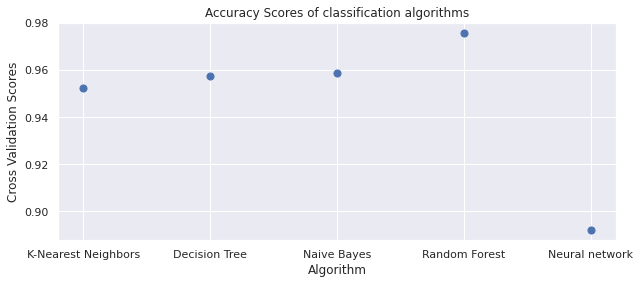

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

scatter_plot=Cross_validation_scores_df.plot.scatter(x='Algorithm',y='Cross Validation Scores',s=50,colormap='viridis', figsize=(10, 4))
scatter_plot.plot()
plt.title('Accuracy Scores of classification algorithms')
plt.show()

# Spliting Data into Training and Testing set

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
y_train.dtype

dtype('int64')

In [ ]:
y_train_list=y_train.copy()

In [ ]:
y_train_list=y_train.copy()
y_test_list=y_test.copy()
Training_set_df=X_train.copy()
Training_set_df['Class']=list(y_train_list)
Training_set_df.to_csv("Initial_training_dataset.csv")
Test_set_df=X_test.copy()
Test_set_df['Class']=list(y_test_list)
Test_set_df.to_csv("Initial_test_dataset.csv")

## Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train.to_numpy())
X_train = pd.DataFrame(X_train, columns=['Combined_ID', 'Year',
       'How.satisfied.are.you.with.your.life.in.general',
       'How.satisfied.are.you.with.Somerville.as.a.place.to.live',
       'How.satisfied.are.you.with.your.neighborhood',
       'How.proud.are.you.to.be.a.Somerville.resident',
       'How.would.you.rate.the.following..The.availability.of.information.about.city.services',
       'How.would.you.rate.the.following..The.cost.of.housing',
       'How.would.you.rate.the.following..The.overall.quality.of.public.schools',
       'How.would.you.rate.the.following..Your.trust.in.the.local.police',
       'How.would.you.rate.the.following..The.maintenance.of.streets.and.sidewalks',
       'How.would.you.rate.the.following..The.availability.of.social.community.events',
       'How.safe.do.you.feel.walking.in.your.neighborhood.at.night',
       'How.satisfied.are.you.with.the.beauty.or.physical.setting.of.your.neighborhood',
       'How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood',
       'What.is.your.gender', 'Age', 'What.is.your.race.or.ethnicity',
       'Do.you.have.children.age.18.or.younger.who.live.with.you',
       'Describe.your.housing.status.in.Somerville',
       'Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years',
       'How.long.have.you.lived.here', 'What.is.your.annual.household.income',
       'Are.you.a.student', 'How.anxious.did.you.feel.yesterday',
       'How.satisfied.are.you.with.the.quality.and.number.of.transportation.options.available.to.you',
       'Language', 'What.languages.do.you.speak.at.home'])
X_test = scaler.fit_transform(X_test.to_numpy())
X_test = pd.DataFrame(X_test, columns=[ 'Combined_ID', 'Year',
       'How.satisfied.are.you.with.your.life.in.general',
       'How.satisfied.are.you.with.Somerville.as.a.place.to.live',
       'How.satisfied.are.you.with.your.neighborhood',
       'How.proud.are.you.to.be.a.Somerville.resident',
       'How.would.you.rate.the.following..The.availability.of.information.about.city.services',
       'How.would.you.rate.the.following..The.cost.of.housing',
       'How.would.you.rate.the.following..The.overall.quality.of.public.schools',
       'How.would.you.rate.the.following..Your.trust.in.the.local.police',
       'How.would.you.rate.the.following..The.maintenance.of.streets.and.sidewalks',
       'How.would.you.rate.the.following..The.availability.of.social.community.events',
       'How.safe.do.you.feel.walking.in.your.neighborhood.at.night',
       'How.satisfied.are.you.with.the.beauty.or.physical.setting.of.your.neighborhood',
       'How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood',
       'What.is.your.gender', 'Age', 'What.is.your.race.or.ethnicity',
       'Do.you.have.children.age.18.or.younger.who.live.with.you',
       'Describe.your.housing.status.in.Somerville',
       'Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years',
       'How.long.have.you.lived.here', 'What.is.your.annual.household.income',
       'Are.you.a.student', 'How.anxious.did.you.feel.yesterday',
       'How.satisfied.are.you.with.the.quality.and.number.of.transportation.options.available.to.you',
       'Language', 'What.languages.do.you.speak.at.home'])

# Choose five attribution selection methods and prepare five reduced training datasets.

### 1. Choosing top five attributes based on Pearson Correlation

In [ ]:
import numpy as np

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # Correlation
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X_train, y_train,10)
print("Attributes selected based on Pearson Correlation are ")
cor_feature

Attributes selected based on Pearson Correlation are 


['How.satisfied.are.you.with.Somerville.as.a.place.to.live',
 'How.satisfied.are.you.with.the.beauty.or.physical.setting.of.your.neighborhood',
 'How.safe.do.you.feel.walking.in.your.neighborhood.at.night',
 'How.would.you.rate.the.following..The.availability.of.social.community.events',
 'How.satisfied.are.you.with.the.quality.and.number.of.transportation.options.available.to.you',
 'Combined_ID',
 'Year',
 'How.satisfied.are.you.with.your.life.in.general',
 'How.satisfied.are.you.with.your.neighborhood',
 'How.proud.are.you.to.be.a.Somerville.resident']

### 2. Choosing top five attributes based on variables with maximum chi-squared values

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
print("Attributes selected based on chi-squared are ")
chi_feature

Attributes selected based on chi-squared are 


['Combined_ID',
 'Year',
 'How.satisfied.are.you.with.your.life.in.general',
 'How.satisfied.are.you.with.Somerville.as.a.place.to.live',
 'How.satisfied.are.you.with.your.neighborhood',
 'How.proud.are.you.to.be.a.Somerville.resident',
 'How.would.you.rate.the.following..The.cost.of.housing',
 'How.satisfied.are.you.with.the.beauty.or.physical.setting.of.your.neighborhood',
 'What.is.your.annual.household.income',
 'How.satisfied.are.you.with.the.quality.and.number.of.transportation.options.available.to.you']

### 3. Choosing top five attributes based on Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe_selector = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(X_norm, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print("Attributes selected based on Recursive Feature Elimination are ")
rfe_feature

Fitting estimator with 28 features.
Fitting estimator with 18 features.
Attributes selected based on Recursive Feature Elimination are 


['How.satisfied.are.you.with.your.life.in.general',
 'How.proud.are.you.to.be.a.Somerville.resident',
 'How.would.you.rate.the.following..The.availability.of.information.about.city.services',
 'How.would.you.rate.the.following..The.overall.quality.of.public.schools',
 'How.safe.do.you.feel.walking.in.your.neighborhood.at.night',
 'How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood',
 'Age',
 'How.long.have.you.lived.here',
 'How.anxious.did.you.feel.yesterday',
 'How.satisfied.are.you.with.the.quality.and.number.of.transportation.options.available.to.you']

### 4. Choosing top five attributes based on Lasso: SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(), max_features=10)
embeded_lr_selector.fit(X_norm, y_train) 

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print("Attributes selected based on Lasso: SelectFromModel are ")
embeded_lr_feature

Attributes selected based on Lasso: SelectFromModel are 


['Year',
 'How.satisfied.are.you.with.your.life.in.general',
 'How.satisfied.are.you.with.your.neighborhood',
 'How.proud.are.you.to.be.a.Somerville.resident',
 'Age',
 'Describe.your.housing.status.in.Somerville',
 'How.anxious.did.you.feel.yesterday',
 'How.satisfied.are.you.with.the.quality.and.number.of.transportation.options.available.to.you']

 ### 5. Choosing top five attributes based on Tree-based: SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

embeded_rf_selector = SelectFromModel(ExtraTreesClassifier(n_estimators=100), max_features=20)
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print("Attributes selected based on Tree-based: SelectFromModel are ")
embeded_rf_feature

Attributes selected based on Tree-based: SelectFromModel are 


['Combined_ID',
 'Year',
 'How.satisfied.are.you.with.your.life.in.general',
 'How.satisfied.are.you.with.your.neighborhood',
 'How.proud.are.you.to.be.a.Somerville.resident',
 'How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood',
 'How.anxious.did.you.feel.yesterday',
 'How.satisfied.are.you.with.the.quality.and.number.of.transportation.options.available.to.you']

In [ ]:
Reduced_train_Set_X1=X_train[X_train.columns[X_train.columns.isin(cor_feature)]]
Reduced_test_Set_X1=X_test[X_test.columns[X_test.columns.isin(cor_feature)]]

Reduced_train_Set_X2=X_train[X_train.columns[X_train.columns.isin(chi_feature)]]
Reduced_test_Set_X2=X_test[X_test.columns[X_test.columns.isin(chi_feature)]]

Reduced_train_Set_X3=X_train[X_train.columns[X_train.columns.isin(rfe_feature)]]
Reduced_test_Set_X3=X_test[X_test.columns[X_test.columns.isin(rfe_feature)]]

Reduced_train_Set_X4=X_train[X_train.columns[X_train.columns.isin(embeded_lr_feature)]]
Reduced_test_Set_X4=X_test[X_test.columns[X_test.columns.isin(embeded_lr_feature)]]


Reduced_train_Set_X5=X_train[X_train.columns[X_train.columns.isin(embeded_rf_feature)]]
Reduced_test_Set_X5=X_test[X_test.columns[X_test.columns.isin(embeded_rf_feature)]]

In [ ]:
All_scores = pd.DataFrame({'Algorithm' : [],'Reduced set':[],'precision': [],'recall':[],'fscore':[],'support':[]})
#All_scores = pd.DataFrame({'Algorithm' : [],'Reduced set':[],'precision': [],'recall':[],'fscore':[],'support':[],'True Positive rate':[],'False Positive rate':[],'ROC':[]})

## Classification models for reduced Training set 1

#### K-Nearest Neighbors

In [ ]:
# KNN
import sklearn.metrics
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(Reduced_train_Set_X1, y_train)
y_pred = KNNclassifier.predict(Reduced_test_Set_X1)
precision,recall,fscore,support=score(y_test,y_pred)

All_scores.loc[-1] = ['K-Nearest Neighbors','Reduced set 1',np.round(np.mean(precision),3),np.round(np.mean(recall),3),np.round(np.mean(fscore),3),np.round(np.mean(support),3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])

print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))
  
print(classification_report(y_test, y_pred))    

-------Confusion Matrix---------
[[226   2]
 [ 21 216]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.91   0.09   0.05   0.83
Class 1 :  0.99   0.01   0.95   0.98
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       228
           1       0.99      0.91      0.95       237

    accuracy                           0.95       465
   macro avg       0.95      0.95      0.95       465
weighted avg       0.95      0.95      0.95       465



#### Decision Tree

In [ ]:
# Decision Tree

DecisionTreeclassifier = tree.DecisionTreeRegressor()
DecisionTreeclassifier.fit(Reduced_train_Set_X1, y_train)
y_pred = DecisionTreeclassifier.predict(Reduced_test_Set_X1)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Decision Tree','Reduced set 1',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))


fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))
 
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[217  11]
 [  3 234]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.99   0.01   0.03   0.97
Class 1 :  0.96   0.04   0.97   0.91
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       228
           1       0.96      0.99      0.97       237

    accuracy                           0.97       465
   macro avg       0.97      0.97      0.97       465
weighted avg       0.97      0.97      0.97       465



#### Naive Bayes

In [ ]:
# Naive Bayes

NaiveBayesclassifier = GaussianNB()
NaiveBayesclassifier.fit(Reduced_train_Set_X1, y_train)
y_pred = NaiveBayesclassifier.predict(Reduced_test_Set_X1)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Naive Bayes','Reduced set 1',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))

print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[  0 228]
 [  0 237]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  nan   nan   0.5   nan
Class 1 :  0.51   0.49   0.5   0.02
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.51      1.00      0.68       237

    accuracy                           0.51       465
   macro avg       0.25      0.50      0.34       465
weighted avg       0.26      0.51      0.34       465



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

#### Random Forest

In [ ]:
# Random Forest

RandomForestclassifier = RandomForestClassifier(max_depth=8, random_state=0)
RandomForestclassifier.fit(Reduced_train_Set_X1, y_train)
y_pred = RandomForestclassifier.predict(Reduced_test_Set_X1)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Random Forest','Reduced set 1',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))


fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))
  
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[225   3]
 [  3 234]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.99   0.01   0.01   0.97
Class 1 :  0.99   0.01   0.99   0.97
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       228
           1       0.99      0.99      0.99       237

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465



In [ ]:
Training_set_df_best_model=Reduced_train_Set_X1
Training_set_df_best_model['Class']=list(y_train)
Training_set_df_best_model.to_csv("Initial_training_dataset_best_model.csv")
Test_set_df_best_model=Reduced_test_Set_X1
Test_set_df_best_model['Class']=list(y_test)
Test_set_df_best_model.to_csv("Initial_test_dataset_best_model.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### Neural network

In [ ]:
# Neural network

NeuralNetworkclassifier = MLPClassifier(max_iter=500, random_state=7)
NeuralNetworkclassifier.fit(Reduced_train_Set_X1, y_train)
y_pred = NeuralNetworkclassifier.predict(Reduced_test_Set_X1)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Neural network','Reduced set 1',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))


fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))
  
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[228   0]
 [  0 237]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  1.0   0.0   0.0   1.0
Class 1 :  1.0   0.0   1.0   1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       237

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465



## Classification models for reduced Training set 2

#### K-Nearest Neighbors

In [ ]:
# KNN

KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(Reduced_train_Set_X2, y_train)
y_pred = KNNclassifier.predict(Reduced_test_Set_X2)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['K-Nearest Neighbors','Reduced set 2',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))

print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[226   2]
 [ 19 218]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.92   0.08   0.04   0.84
Class 1 :  0.99   0.01   0.96   0.98
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       228
           1       0.99      0.92      0.95       237

    accuracy                           0.95       465
   macro avg       0.96      0.96      0.95       465
weighted avg       0.96      0.95      0.95       465



#### Decision Tree

In [ ]:
# Decision Tree

DecisionTreeclassifier = tree.DecisionTreeRegressor()
DecisionTreeclassifier.fit(Reduced_train_Set_X2, y_train)
y_pred = DecisionTreeclassifier.predict(Reduced_test_Set_X2)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Decision Tree','Reduced set 2',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))


fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))
 
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[213  15]
 [  4 233]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.98   0.02   0.04   0.96
Class 1 :  0.94   0.06   0.96   0.88
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       228
           1       0.94      0.98      0.96       237

    accuracy                           0.96       465
   macro avg       0.96      0.96      0.96       465
weighted avg       0.96      0.96      0.96       465



#### Naive Bayes

In [ ]:
# Naive Bayes

NaiveBayesclassifier = GaussianNB()
NaiveBayesclassifier.fit(Reduced_train_Set_X2, y_train)
y_pred = NaiveBayesclassifier.predict(Reduced_test_Set_X2)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Naive Bayes','Reduced set 2',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))


fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))

print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[  0 228]
 [  0 237]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  nan   nan   0.5   nan
Class 1 :  0.51   0.49   0.5   0.02
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.51      1.00      0.68       237

    accuracy                           0.51       465
   macro avg       0.25      0.50      0.34       465
weighted avg       0.26      0.51      0.34       465



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

#### Random Forest

In [ ]:
# Random Forest

RandomForestclassifier = RandomForestClassifier(max_depth=8, random_state=0)
RandomForestclassifier.fit(Reduced_train_Set_X2, y_train)
y_pred = RandomForestclassifier.predict(Reduced_test_Set_X2)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Random Forest','Reduced set 2',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))


fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))

print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[223   5]
 [  4 233]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.98   0.02   0.02   0.96
Class 1 :  0.98   0.02   0.98   0.96
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       228
           1       0.98      0.98      0.98       237

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465



#### Neural network

In [ ]:
# Neural network

NeuralNetworkclassifier = MLPClassifier(max_iter=500, random_state=7)
NeuralNetworkclassifier.fit(Reduced_train_Set_X2, y_train)
y_pred = NeuralNetworkclassifier.predict(Reduced_test_Set_X2)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Neural network','Reduced set 2',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))


fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))
  
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[221   7]
 [  6 231]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.97   0.03   0.03   0.95
Class 1 :  0.97   0.03   0.97   0.94
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       228
           1       0.97      0.97      0.97       237

    accuracy                           0.97       465
   macro avg       0.97      0.97      0.97       465
weighted avg       0.97      0.97      0.97       465



## Classification models for reduced Training set 3

#### K-Nearest Neighbors

In [ ]:
# KNN

KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(Reduced_train_Set_X3, y_train)
y_pred = KNNclassifier.predict(Reduced_test_Set_X3)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['K-Nearest Neighbors','Reduced set 3',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))


fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[219   9]
 [ 21 216]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.91   0.09   0.06   0.82
Class 1 :  0.96   0.04   0.94   0.92
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       228
           1       0.96      0.91      0.94       237

    accuracy                           0.94       465
   macro avg       0.94      0.94      0.94       465
weighted avg       0.94      0.94      0.94       465



#### Decision Tree

In [ ]:
# Decision Tree

DecisionTreeclassifier = tree.DecisionTreeRegressor()
DecisionTreeclassifier.fit(Reduced_train_Set_X3, y_train)
y_pred = DecisionTreeclassifier.predict(Reduced_test_Set_X3)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Decision Tree','Reduced set 3',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))
 
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[213  15]
 [  7 230]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.97   0.03   0.05   0.94
Class 1 :  0.94   0.06   0.95   0.88
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       228
           1       0.94      0.97      0.95       237

    accuracy                           0.95       465
   macro avg       0.95      0.95      0.95       465
weighted avg       0.95      0.95      0.95       465



#### Naive Bayes

In [ ]:
# Naive Bayes

NaiveBayesclassifier = GaussianNB()
NaiveBayesclassifier.fit(Reduced_train_Set_X3, y_train)
y_pred = NaiveBayesclassifier.predict(Reduced_test_Set_X3)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Naive Bayes','Reduced set 3',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))  
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[222   6]
 [ 21 216]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.91   0.09   0.06   0.83
Class 1 :  0.97   0.03   0.94   0.95
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       228
           1       0.97      0.91      0.94       237

    accuracy                           0.94       465
   macro avg       0.94      0.94      0.94       465
weighted avg       0.94      0.94      0.94       465



#### Random Forest

In [ ]:
# Random Forest

RandomForestclassifier = RandomForestClassifier(max_depth=8, random_state=0)
RandomForestclassifier.fit(Reduced_train_Set_X3, y_train)
y_pred = RandomForestclassifier.predict(Reduced_test_Set_X3)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Random Forest','Reduced set 3',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))
 
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[225   3]
 [  4 233]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.98   0.02   0.02   0.97
Class 1 :  0.99   0.01   0.98   0.97
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       228
           1       0.99      0.98      0.99       237

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465



#### Neural network

In [ ]:
# Neural network

NeuralNetworkclassifier = MLPClassifier(max_iter=500, random_state=7)
NeuralNetworkclassifier.fit(Reduced_train_Set_X3, y_train)
y_pred = NeuralNetworkclassifier.predict(Reduced_test_Set_X3)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Neural network','Reduced set 3',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))


fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[220   8]
 [ 15 222]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.94   0.06   0.05   0.87
Class 1 :  0.97   0.03   0.95   0.93
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       228
           1       0.97      0.94      0.95       237

    accuracy                           0.95       465
   macro avg       0.95      0.95      0.95       465
weighted avg       0.95      0.95      0.95       465



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Classification models for reduced Training set 4

#### K-Nearest Neighbors

In [ ]:
# KNN

KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(Reduced_train_Set_X4, y_train)
y_pred = KNNclassifier.predict(Reduced_test_Set_X4)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['K-Nearest Neighbors','Reduced set 4',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))


fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))  
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[225   3]
 [ 10 227]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.96   0.04   0.03   0.91
Class 1 :  0.99   0.01   0.97   0.97
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       228
           1       0.99      0.96      0.97       237

    accuracy                           0.97       465
   macro avg       0.97      0.97      0.97       465
weighted avg       0.97      0.97      0.97       465



#### Decision Tree

In [ ]:
# Decision Tree

DecisionTreeclassifier = tree.DecisionTreeRegressor()
DecisionTreeclassifier.fit(Reduced_train_Set_X4, y_train)
y_pred = DecisionTreeclassifier.predict(Reduced_test_Set_X4)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Decision Tree','Reduced set 4',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[217  11]
 [  6 231]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.97   0.03   0.04   0.95
Class 1 :  0.95   0.05   0.96   0.91
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       228
           1       0.95      0.97      0.96       237

    accuracy                           0.96       465
   macro avg       0.96      0.96      0.96       465
weighted avg       0.96      0.96      0.96       465



#### Naive Bayes

In [ ]:
# Naive Bayes

NaiveBayesclassifier = GaussianNB()
NaiveBayesclassifier.fit(Reduced_train_Set_X4, y_train)
y_pred = NaiveBayesclassifier.predict(Reduced_test_Set_X4)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Naive Bayes','Reduced set 4',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))


fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2)) 
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[  0 228]
 [  0 237]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  nan   nan   0.5   nan
Class 1 :  0.51   0.49   0.5   0.02
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.51      1.00      0.68       237

    accuracy                           0.51       465
   macro avg       0.25      0.50      0.34       465
weighted avg       0.26      0.51      0.34       465



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

#### Random Forest

In [ ]:
# Random Forest

RandomForestclassifier = RandomForestClassifier(max_depth=8, random_state=0)
RandomForestclassifier.fit(Reduced_train_Set_X4, y_train)
y_pred = RandomForestclassifier.predict(Reduced_test_Set_X4)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Random Forest','Reduced set 4',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))  
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[224   4]
 [  6 231]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.97   0.03   0.02   0.95
Class 1 :  0.98   0.02   0.98   0.97
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       228
           1       0.98      0.97      0.98       237

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465



#### Neural network

In [ ]:
# Neural network

NeuralNetworkclassifier = MLPClassifier(max_iter=500, random_state=7)
NeuralNetworkclassifier.fit(Reduced_train_Set_X4, y_train)
y_pred = NeuralNetworkclassifier.predict(Reduced_test_Set_X4)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Neural network','Reduced set 4',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[222   6]
 [  9 228]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.96   0.04   0.03   0.92
Class 1 :  0.97   0.03   0.97   0.95
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       228
           1       0.97      0.96      0.97       237

    accuracy                           0.97       465
   macro avg       0.97      0.97      0.97       465
weighted avg       0.97      0.97      0.97       465



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Classification models for reduced Training set 5

#### K-Nearest Neighbors

In [ ]:
# KNN

KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(Reduced_train_Set_X5, y_train)
y_pred = KNNclassifier.predict(Reduced_test_Set_X5)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['K-Nearest Neighbors','Reduced set 5',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))  
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[226   2]
 [ 10 227]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.96   0.04   0.03   0.92
Class 1 :  0.99   0.01   0.97   0.98
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       228
           1       0.99      0.96      0.97       237

    accuracy                           0.97       465
   macro avg       0.97      0.97      0.97       465
weighted avg       0.97      0.97      0.97       465



#### Decision Tree

In [ ]:
# Decision Tree

DecisionTreeclassifier = tree.DecisionTreeRegressor()
DecisionTreeclassifier.fit(Reduced_train_Set_X5, y_train)
y_pred = DecisionTreeclassifier.predict(Reduced_test_Set_X5)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Decision Tree','Reduced set 5',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))  
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[219   9]
 [  4 233]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.98   0.02   0.03   0.96
Class 1 :  0.96   0.04   0.97   0.93
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       228
           1       0.96      0.98      0.97       237

    accuracy                           0.97       465
   macro avg       0.97      0.97      0.97       465
weighted avg       0.97      0.97      0.97       465



#### Naive Bayes

In [ ]:
# Naive Bayes

NaiveBayesclassifier = GaussianNB()
NaiveBayesclassifier.fit(Reduced_train_Set_X5, y_train)
y_pred = NaiveBayesclassifier.predict(Reduced_test_Set_X5)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Naive Bayes','Reduced set 5',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))  
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[  0 228]
 [  0 237]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  nan   nan   0.5   nan
Class 1 :  0.51   0.49   0.5   0.02
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.51      1.00      0.68       237

    accuracy                           0.51       465
   macro avg       0.25      0.50      0.34       465
weighted avg       0.26      0.51      0.34       465



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

#### Random Forest

In [ ]:
# Random Forest

RandomForestclassifier = RandomForestClassifier(max_depth=8, random_state=0)
RandomForestclassifier.fit(Reduced_train_Set_X5, y_train)
y_pred = RandomForestclassifier.predict(Reduced_test_Set_X5)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Random Forest','Reduced set 5',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2)) 
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[225   3]
 [  6 231]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.97   0.03   0.02   0.95
Class 1 :  0.99   0.01   0.98   0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       228
           1       0.99      0.97      0.98       237

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465



#### Neural network

In [ ]:
# Neural network

NeuralNetworkclassifier = MLPClassifier(max_iter=500, random_state=7)
NeuralNetworkclassifier.fit(Reduced_train_Set_X5, y_train)
y_pred = NeuralNetworkclassifier.predict(Reduced_test_Set_X5)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
if support==None:
   support=0.00
All_scores.loc[-1] = ['Neural network','Reduced set 5',np.round(precision,3),np.round(recall,3),np.round(fscore,3),np.round(support,3)]  
All_scores.index = All_scores.index + 1 
All_scores = All_scores.sort_index()
print("-------Confusion Matrix---------")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

fpr = {}
tpr = {}
roc_auc={}
thresh ={}
n_class = 2
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = sklearn.metrics.roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
print("\t---TP-----FP-----ROC-----MCC---")
print("Class 0 : ",np.round(tn/(tn+fn),2)," ",np.round(fn/(tn+fn),2)," ",np.round(roc_auc[0],2)," ",np.round((tn-fn)/(tn+fn),2))    
print("Class 1 : ",np.round(tp/(tp+fp),2)," ",np.round(fp/(tp+fp),2)," ",np.round(roc_auc[1],2)," ",np.round((tp-fp)/(tp+fp),2))  
print(classification_report(y_test, y_pred))   

-------Confusion Matrix---------
[[224   4]
 [  6 231]]
	---TP-----FP-----ROC-----MCC---
Class 0 :  0.97   0.03   0.02   0.95
Class 1 :  0.98   0.02   0.98   0.97
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       228
           1       0.98      0.97      0.98       237

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465



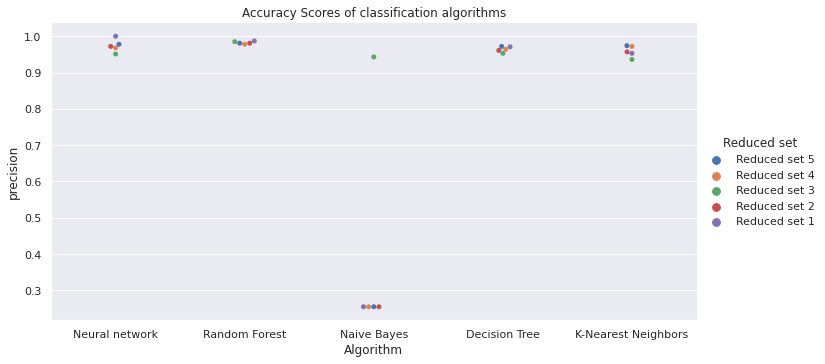

In [ ]:
sns.catplot(x='Algorithm', y='precision', data=All_scores, hue='Reduced set', kind="swarm",  height=5, aspect=2)
plt.title('Accuracy Scores of classification algorithms')
plt.show()

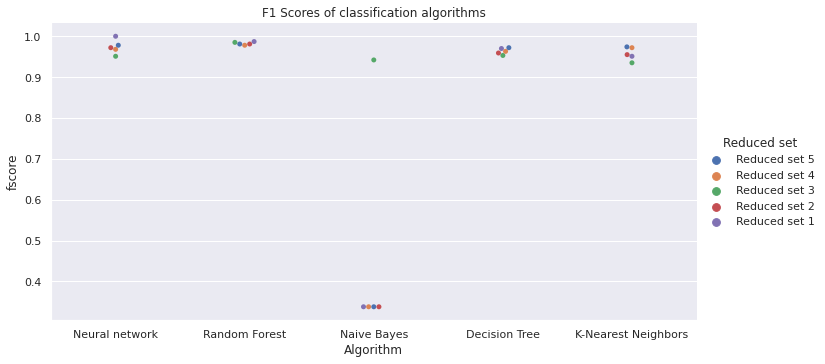

In [ ]:
sns.catplot(x='Algorithm', y='fscore', data=All_scores, hue='Reduced set', kind="swarm",  height=5, aspect=2)
plt.title('F1 Scores of classification algorithms')
plt.show()

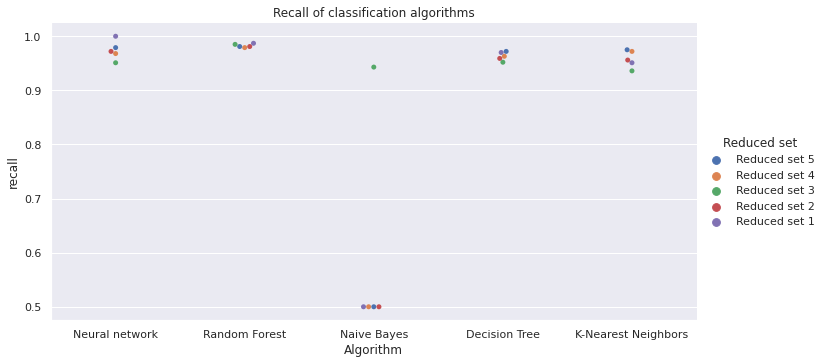

In [ ]:
sns.catplot(x='Algorithm', y='recall', data=All_scores, hue='Reduced set', kind="swarm",  height=5, aspect=2)
plt.title('Recall of classification algorithms')
plt.show()